<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### **Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

Customer churn is a significant challenge for banks, as losing clients translates to lost revenue and increased customer acquisition costs. Identifying customers at risk of churning allows banks to proactively address their concerns and develop targeted retention strategies.

### **Objective**

Customers interact with banks in various ways, influencing their decisions to stay or leave. These interactions generate a wealth of data, including demographic information, account activity, product usage, and customer service interactions. However, manually analyzing this data to identify churn patterns is inefficient and lacks scalability.

This project proposes a data-driven approach to customer churn prediction. We will build a neural network model that can analyze customer data and predict whether a customer is likely to churn within the next 6 months.


### **Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

In [2]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing tensorflow and kearas libraries
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# supress warnings
import warnings
warnings.filterwarnings("ignore")


import time




In [3]:
# set display for floats
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Loading the dataset

In [ ]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read csv into panda dataframe ds

ds = pd.read_csv("/content/drive/MyDrive/AIClass/neuralNetworks/Churn.csv")

## Data Overview

***Dataset Overview***


*   The dataset consists of 10,000 data points (rows) and 14 features (columns).
*   Three of these features are categorical (type object).
*   There are no duplicate rows in the dataset.

---

***Data Cleaning and Analysis***



**Unique Identifiers**: Will remove unnecessary columns like RowNumber and CustomerID as they don't contribute to predicting customer churn.

**Credit Score**: Values fall within the expected range (350-850).

---


***Customer Demographics***

**Age**: Average customer age is 39, with a minimum of 18 and a maximum of 92.

**Tenure**: The average customer has been with the bank for 5 years (min 0, max 10).

---
***Financial Information***

**Balance**: Average account balance is \$76,485.89 (min \$0, max \$250,898).

**Products**: Customers hold an average of 1.5 products (min 1, max 4).

**Credit Card Ownership**: The majority of customers (70%) have a credit card (HasCrCard mean = 0.7).

**Activity**: Half of the customers are active members (IsActiveMember mean = 0.5).

**Salary**: Average estimated salary is \$100,090.24 (min \$11.58, max \$199,992.48).

---

***Customer Churn***

Only a small percentage of customers (20%) have churned (Exited mean = 0.2).





In [ ]:
# preview first 5 rows od dataset
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [ ]:
# preview last rows of the dataset
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.6100,1,1,1,101699.7700,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.0000,1,0,1,42085.5800,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.3100,2,1,0,92888.5200,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.7900,1,1,0,38190.7800,0


In [ ]:
# get shape of the dataset
ds.shape

(10000, 14)

In [ ]:
# inspect dataset column types and null values
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# get stats for the dataset
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


In [ ]:
# see number of null values by column
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# see all unique values per column
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# checking for duplicate rows
ds.duplicated().sum()

0

In [ ]:
# check for missing value percentages

# Let's check for missing values in the data
round(ds.isnull().sum() / ds.isnull().count() * 100, 2)

RowNumber         0.0000
CustomerId        0.0000
Surname           0.0000
CreditScore       0.0000
Geography         0.0000
Gender            0.0000
Age               0.0000
Tenure            0.0000
Balance           0.0000
NumOfProducts     0.0000
HasCrCard         0.0000
IsActiveMember    0.0000
EstimatedSalary   0.0000
Exited            0.0000
dtype: float64

In [ ]:
# check for value counts for Exited

ds['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Drop unique identifier columns

In [ ]:
# Drop columns RowNumber , CustomerId and Surname b/c the are unique
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# get list of unique values for all object columns

for i in ds.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(ds[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# prompt: save and download ds dataframe

ds.to_csv('bank_churn.csv', index=False)



## Exploratory Data Analysis

In [ ]:
# import reusable functions
%run "/content/drive/MyDrive/AIClass/Machine Learning/linreg.ipynb"

### Univariate Analysis

#### Data Distribution

**Credit Score**: The data is left-skewed, indicating more customers have higher credit scores.

**Geography**: The dataset focuses on three European countries  (France, Germany, Spain).  France represents 50% and roughly equal representation for Germany and Spain (25% each).

**Gender**: The customer base is slightly skewed towards males (54.6%).

**Age**: Age distribution is right-skewed, with a higher concentration of younger customers.

**Tenure**: Most customers have been with the bank for 1-9 years, with fewer at the extremes (0 and 10 years).

**Balance**: The distribution has a peak at zero, but balances above zero appear to follow a normal distribution.

**Number of Products**: Most customers have 1 or 2 products, with a significant drop-off in those with 3 or 4.

**Estimated Salary**: Salary is uniformly distributed across all ranges within the dataset.

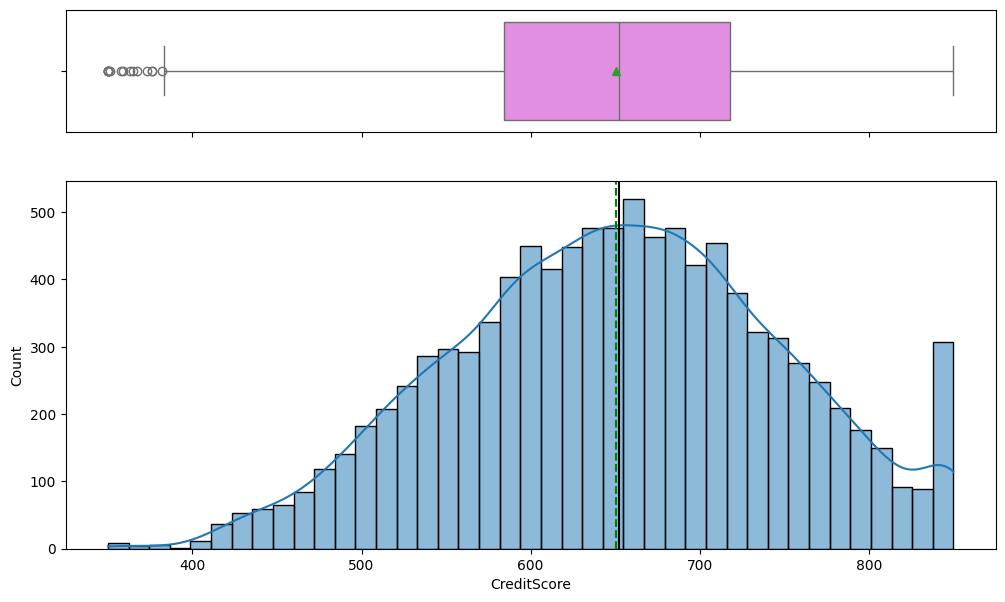

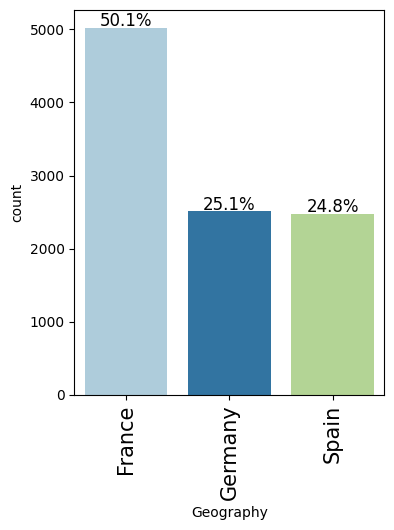

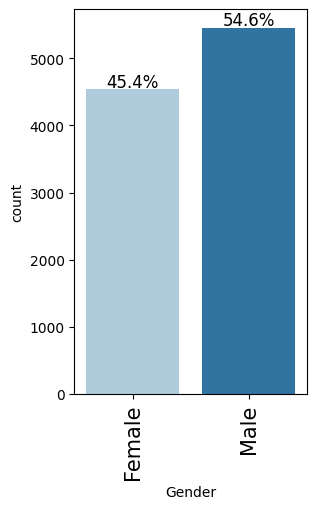

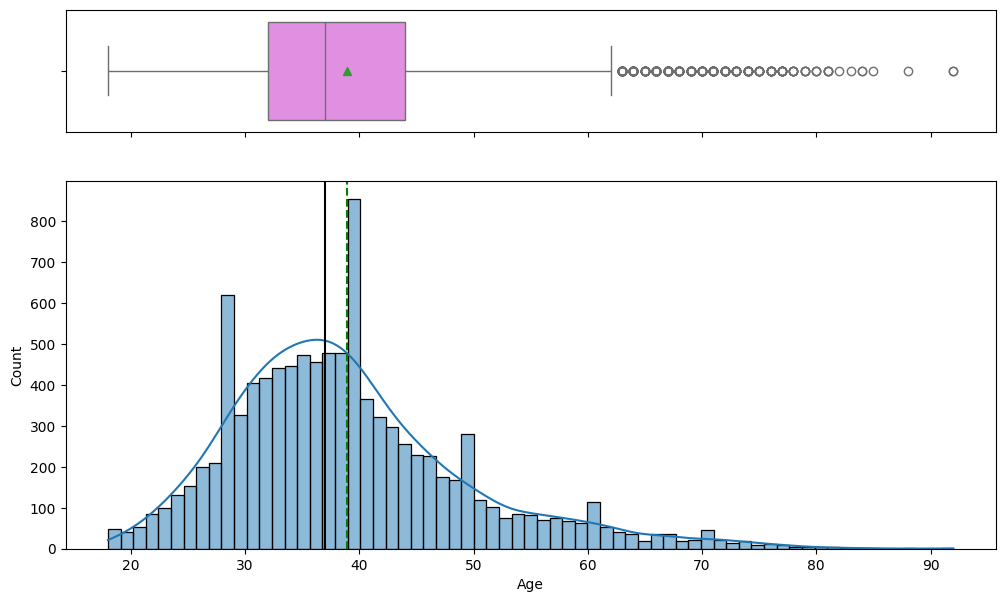

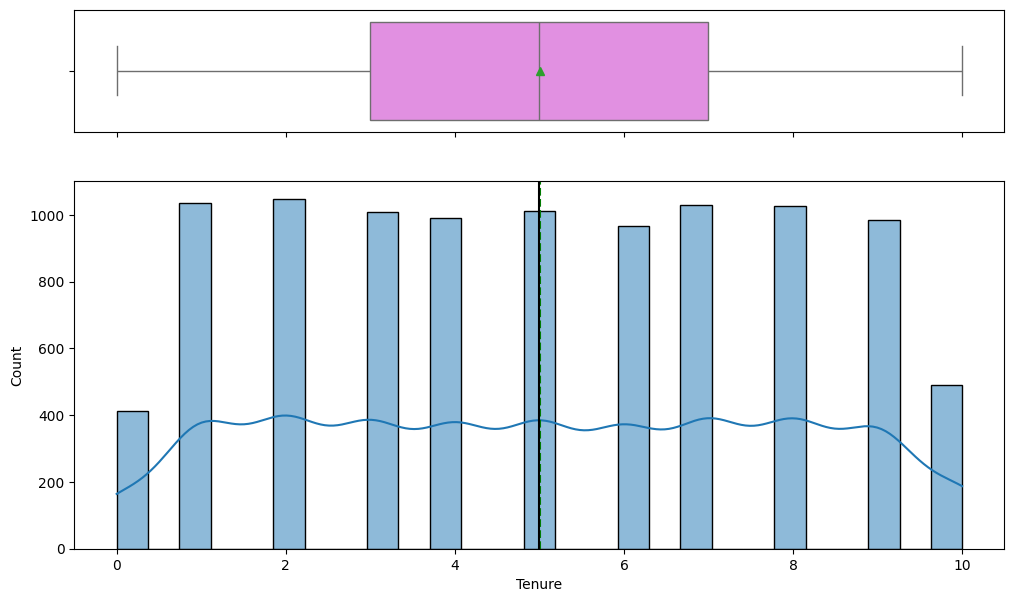

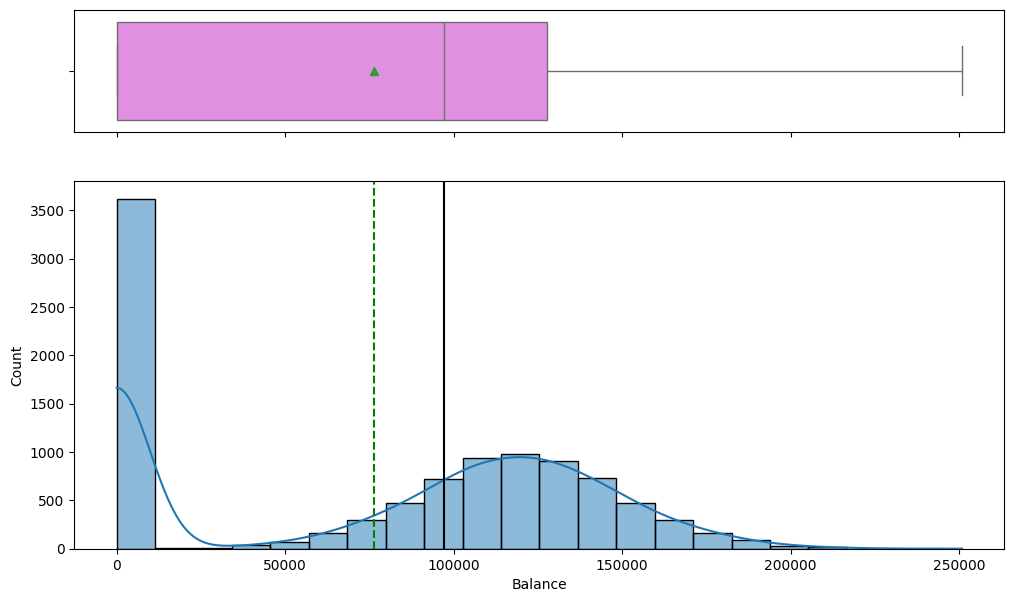

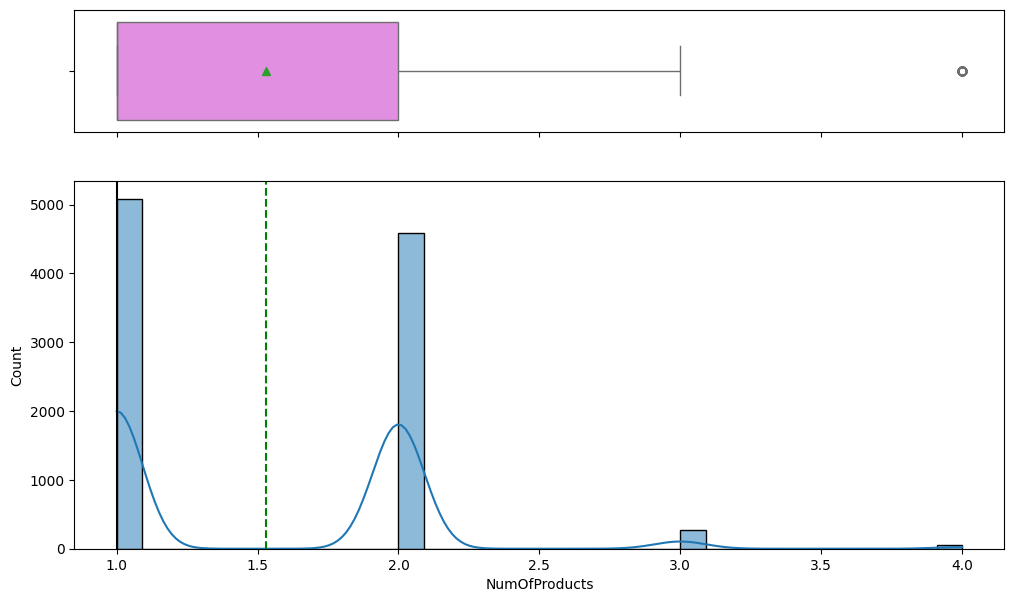

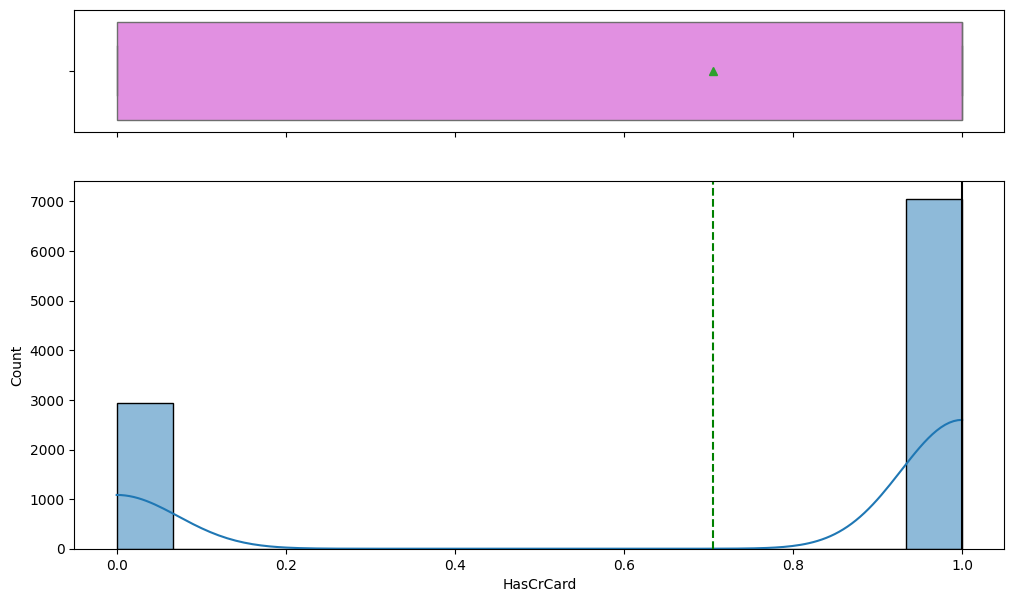

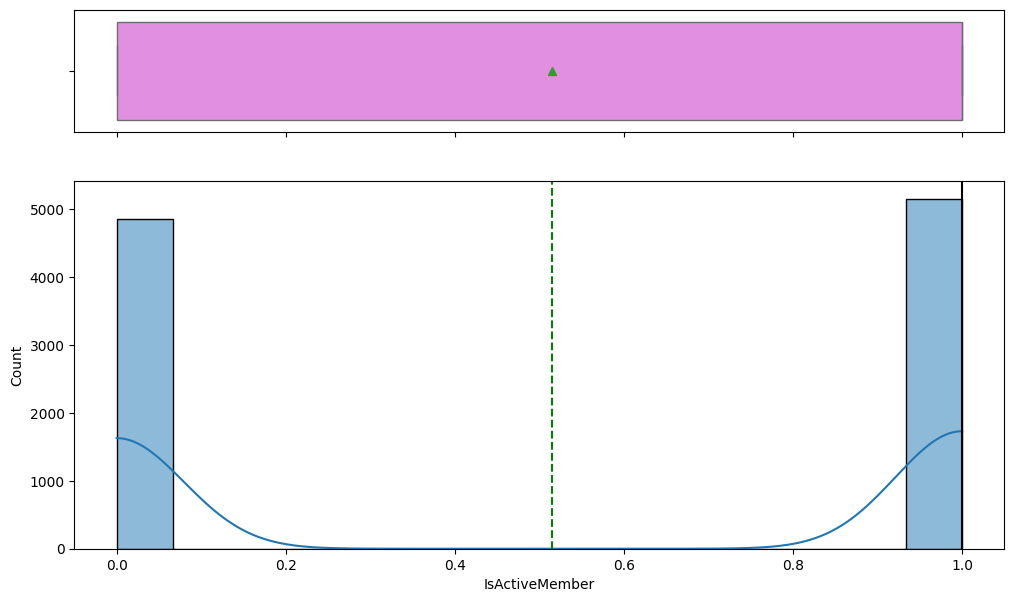

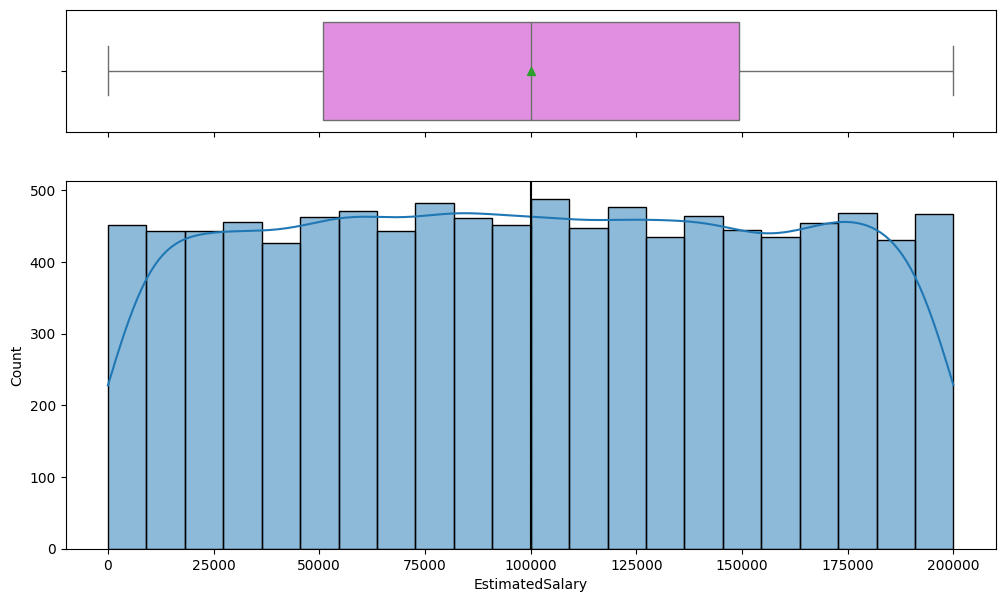

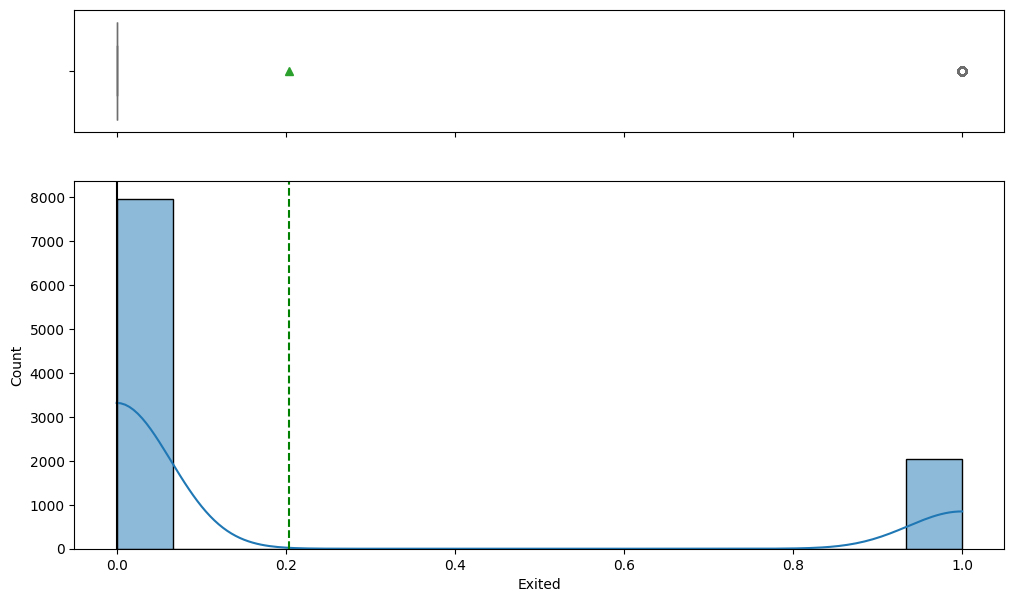

In [ ]:
# edaVisuals function is from the linreg.ipynb notebook
# Visualization of univariates with box, histograms, and count plots

edaVisuals(ds, True, True)

### Bivariate Analysis

#### **Correlation Analysis**

There is weak or negligible correlation between most of the numerical features in the dataset.

However, there exists a weak negative correlation (correlation coefficient of -0.30) between account balance and the number of products a customer holds. This indicates a slight tendency for customers with higher balances to have fewer products, and vice versa.

There's a weak positive correlation between Age and Churn.  

#### **Customer Characteristics and Churn**

**Geography**: Customers in Germany have a higher churn rate compared to France and Spain.

**Gender**: Females churn at a slightly higher rate than males.

**Credit Card Ownership**: Having a credit card doesn't seem to significantly impact churn.

**Activity**: Inactive members are more likely to churn than active ones.

**Age**: Customers who churn tend to be older, with a higher median age compared to those who remain.

**Tenure**: There's no significant difference in median tenure between churned and non-churned customers.

**Balance**: Customers who churn have a slightly higher median account balance.

**Number of Products**: The number of products held doesn't seem to be a major factor in churn.

**Salary**: The median estimated salary is slightly higher for customers who churn, but the difference is minimal.

In [ ]:
# subset ds to only include numerical columns

numerical_columns = ds.select_dtypes(include=['int64', 'float64']).columns
ds_num = ds[numerical_columns]

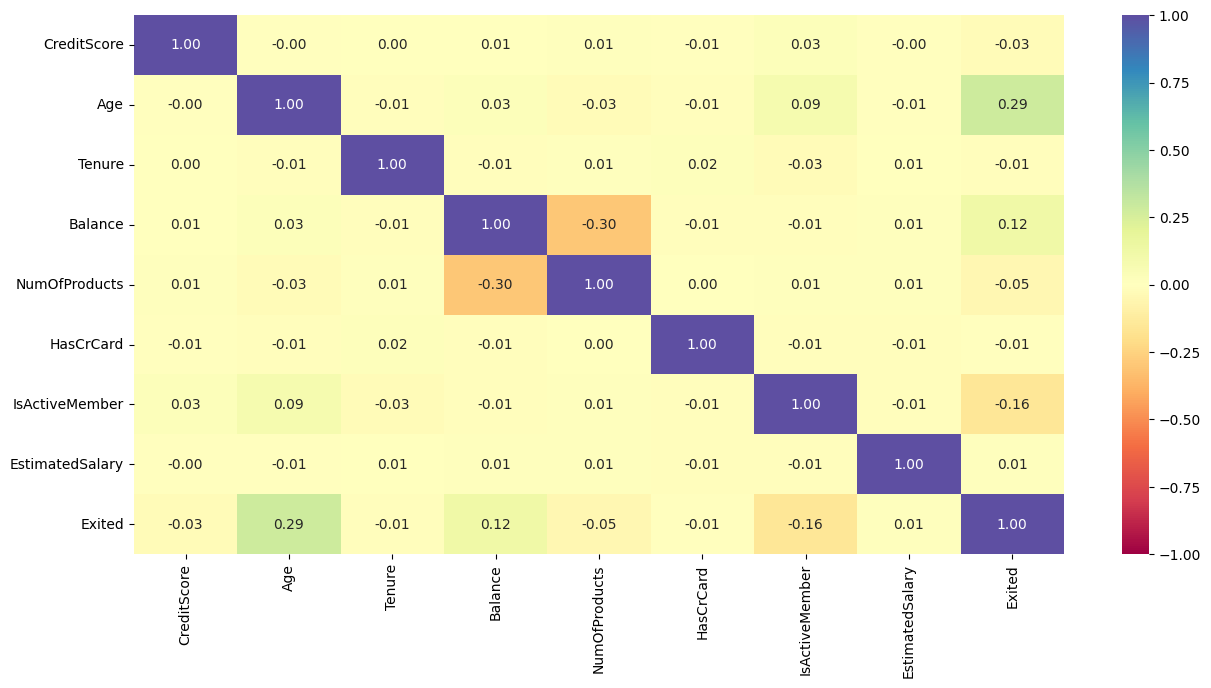

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds_num.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


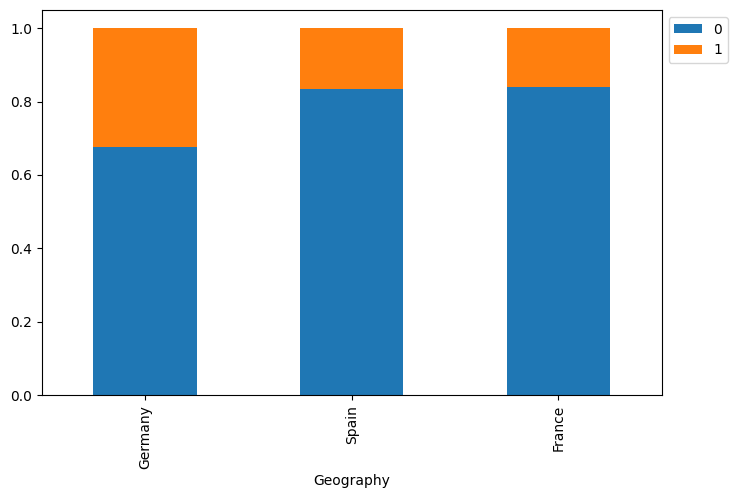

In [ ]:
#vExited Vs Geography
stacked_barplot(ds, "Geography", "Exited" )

More customers from Germany Churn, than Spain and France.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


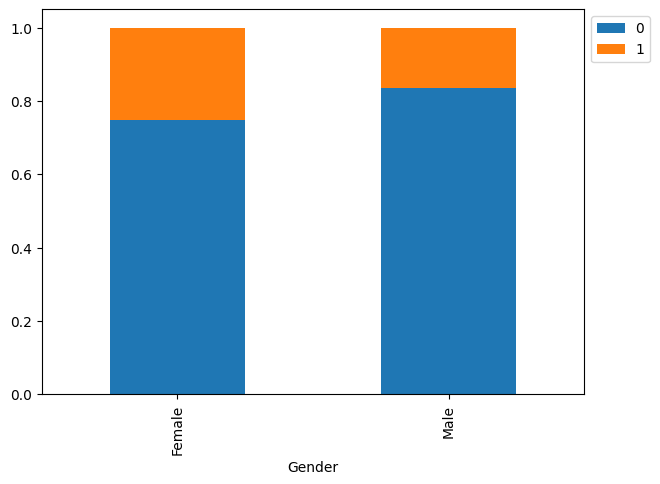

In [ ]:
# Exited Vs Gender
stacked_barplot(ds, "Gender", "Exited" )

More female customers churn.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


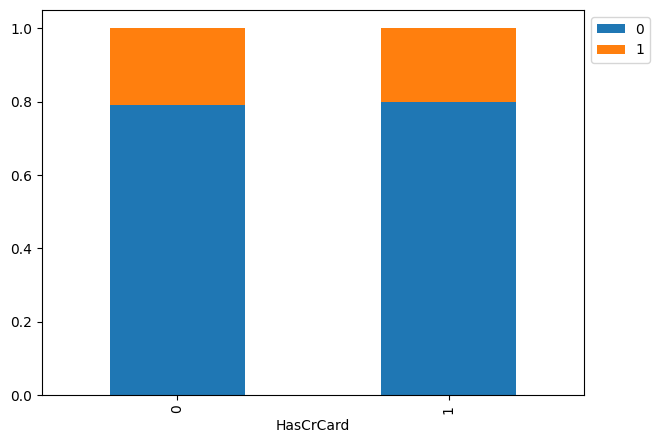

In [ ]:
# Exited Vs HasCrCard
stacked_barplot(ds, "HasCrCard", "Exited" )

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


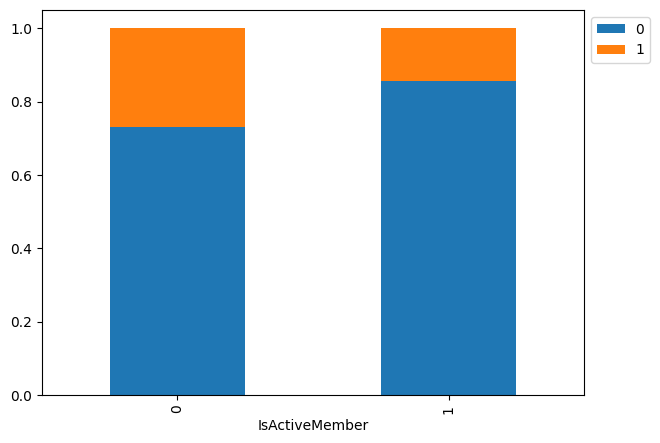

In [ ]:
# Exited Vs IsActiveMember
stacked_barplot(ds, "IsActiveMember", "Exited" )

More inactive customers churn.

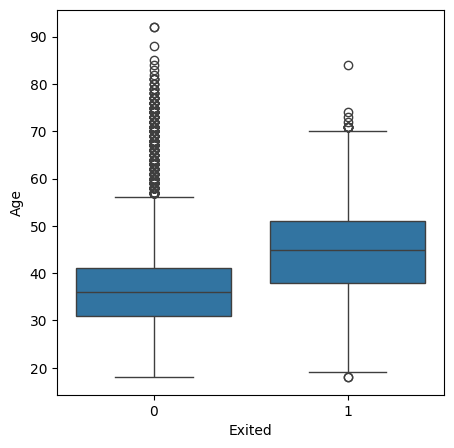

In [ ]:
# Exited Vs Age

plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

Customers that churned have a higher median age.

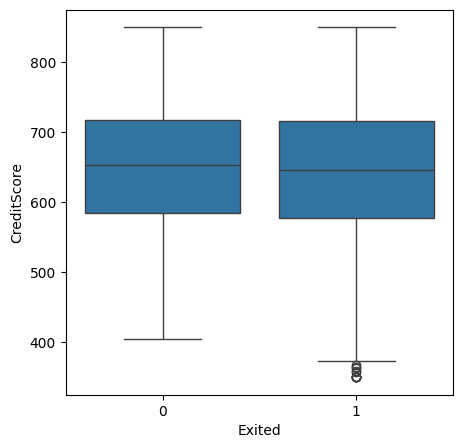

In [ ]:
# Exited Vs CreditScore

plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

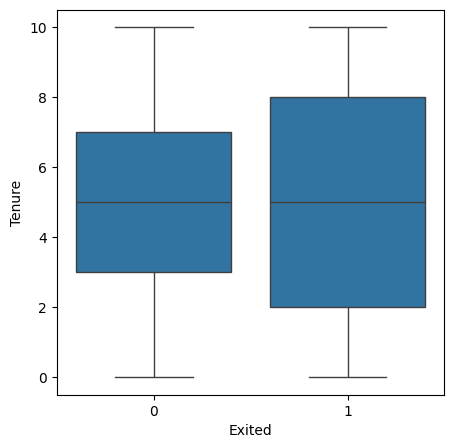

In [ ]:
# Exited Vs Tenure

plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

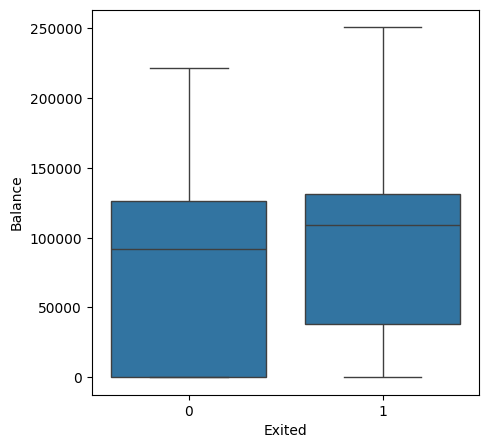

In [ ]:
# Exited Vs Balance

plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

Customers that churned have a higher median balance.

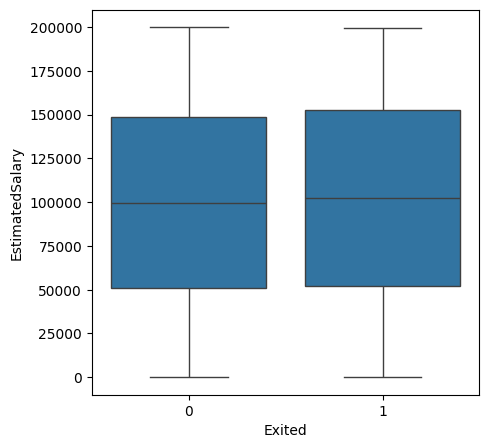

In [ ]:
#  Exited vs EstimatedSalary

plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

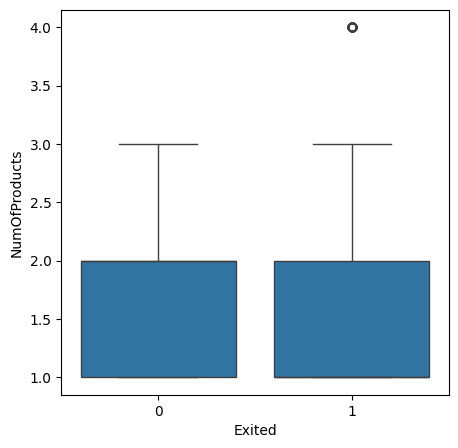

In [ ]:
# Exited Vs NumOfProducts

plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

## Data Preprocessing

### Train-validation-test Split

In [ ]:
# create X and y variables

X = ds.drop(['Exited'],axis=1)
y = ds['Exited'] # Exited

create a 80/20 split, giving test data 20% of the dataset

In [ ]:
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

create a 80/20 split using result of first split, resulting in 20% data for test, 16% for validation and 64% for training

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 10) (1600, 10) (2000, 10)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Dummy Variable Creation

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

### Data Normalization

In [ ]:
# normalize numeric columns

cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

### Utility Functions

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    #recall = recall_score(target, pred, average='weighted')  # to compute Recall
    recall = recall_score(target, pred)
    #precision = precision_score(target, pred, average='weighted')  # to compute Precision
    precision = precision_score(target, pred)
    #f1 = f1_score(target, pred, average='weighted')  # to compute F1-score
    f1 = f1_score(target, pred)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

## Model Building

### Model Evaluation Criterion

In this model, we prioritize recall, which emphasizes capturing as many potential churners as possible. This is crucial for bank customer churn prediction, where retaining valuable clients is paramount. Missing true churners (false negatives) leads to lost revenue and potential reputational damage. While false positives (flagging loyal customers as churn risks) can waste resources, they do less harm than losing existing customers.

Therefore, recall becomes our primary evaluation metric. Unlike focusing solely on precision (avoiding false positives), recall prioritizes identifying all potential churners. A high recall score indicates the model effectively finds true churners, allowing the bank to target these customers with retention efforts. This could involve improving service, addressing pain points, and ultimately preventing them from leaving.

By prioritizing high recall, the bank ensures its resources are directed towards customers genuinely at risk of churn. This minimizes unnecessary interactions with non-churning customers, maximizing the model's effectiveness in both predicting churn and optimizing retention efforts.

#### **Commonalities Across Models**:


*   Batch Size: 64
*   Epochs: 115
*   Early Stopping: Implemented for preventing overfitting
*   Loss Function: 'binary_crossentropy' (suitable for binary classification)
*   Evaluation Metric: Recall
*   Activation Function for Input and Hidden Layer = Relu
*   Activation Function for Ouput Layer = Sigmoid
*   Input Layer has 128 neurons
*   Hidden Layers have 64 and 32 neurons respectively




In [ ]:
#converting to float32 for tensor

X_train = X_train.astype('float32')  # Convert to float32
X_val = X_val.astype('float32')  # Convert to float32
X_test = X_test.astype('float32')  # Convert to float32
y_val = y_val.astype('float32')
y_train = y_train.astype('float32')

### Neural Network with SGD Optimizer

Defining number of epochs and batch size for all models.




In [ ]:
epochs=115
batch_size=64

In [ ]:
# clear session
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network

model_0 = Sequential()
# input layer 128 neurons
model_0.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# hidden layers 64 and 32 neurons
model_0.add(Dense(64, activation='relu'))
model_0.add(Dense(32, activation='relu'))

# output layer
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# defining SGD optimizer and Recall Metric, using default learning rate 0.01

optimizer = tf.keras.optimizers.SGD()
metric = keras.metrics.Recall()




In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Fitting the Model and adding early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=2, mode='auto', restore_best_weights=True)

start = time.time()
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose =2,
    callbacks=[early_stopping]

)

end=time.time()

Epoch 1/115
100/100 - 4s - loss: 0.5632 - recall: 0.0031 - val_loss: 0.5088 - val_recall: 0.0000e+00 - 4s/epoch - 38ms/step
Epoch 2/115
100/100 - 1s - loss: 0.4974 - recall: 0.0000e+00 - val_loss: 0.4884 - val_recall: 0.0000e+00 - 866ms/epoch - 9ms/step
Epoch 3/115
100/100 - 1s - loss: 0.4844 - recall: 0.0000e+00 - val_loss: 0.4788 - val_recall: 0.0000e+00 - 1s/epoch - 11ms/step
Epoch 4/115
100/100 - 1s - loss: 0.4751 - recall: 0.0000e+00 - val_loss: 0.4703 - val_recall: 0.0000e+00 - 817ms/epoch - 8ms/step
Epoch 5/115
100/100 - 1s - loss: 0.4666 - recall: 0.0000e+00 - val_loss: 0.4627 - val_recall: 0.0000e+00 - 1s/epoch - 11ms/step
Epoch 6/115
100/100 - 1s - loss: 0.4590 - recall: 0.0000e+00 - val_loss: 0.4558 - val_recall: 0.0000e+00 - 964ms/epoch - 10ms/step
Epoch 7/115
100/100 - 1s - loss: 0.4522 - recall: 0.0000e+00 - val_loss: 0.4498 - val_recall: 0.0000e+00 - 1s/epoch - 10ms/step
Epoch 8/115
100/100 - 1s - loss: 0.4460 - recall: 0.0000e+00 - val_loss: 0.4447 - val_recall: 0.0000e

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  49.85672855377197


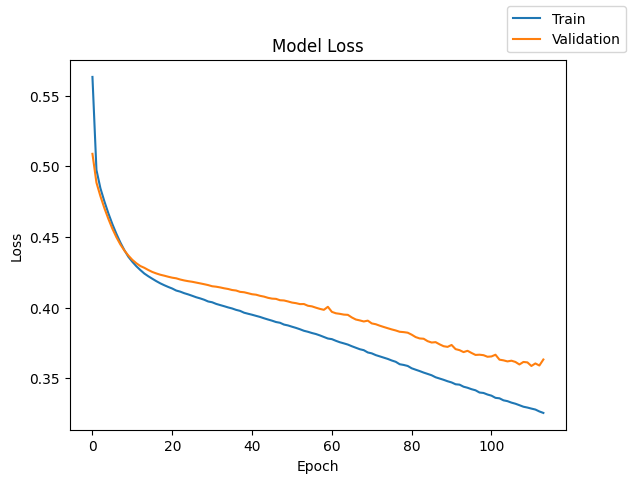

In [ ]:
plot(history_0,'loss')

In [ ]:
#calculating predicted for training
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 2ms/step


##### Classicfication Report for Training Data

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      5096
         1.0       0.77      0.49      0.60      1304

    accuracy                           0.87      6400
   macro avg       0.82      0.73      0.76      6400
weighted avg       0.86      0.87      0.85      6400



Confusion Matrix for Training Data

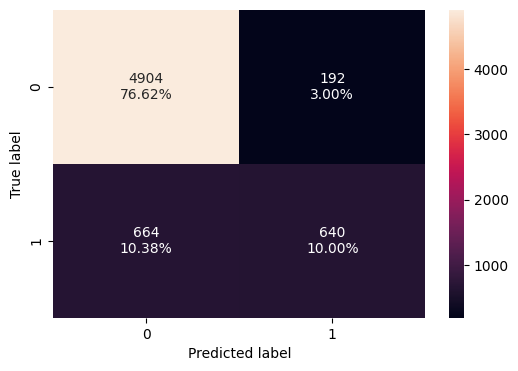

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

Classification report for Validation Data

In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.43      0.54       326

    accuracy                           0.85      1600
   macro avg       0.80      0.70      0.73      1600
weighted avg       0.84      0.85      0.84      1600



Confusion Matrix for Validation Data

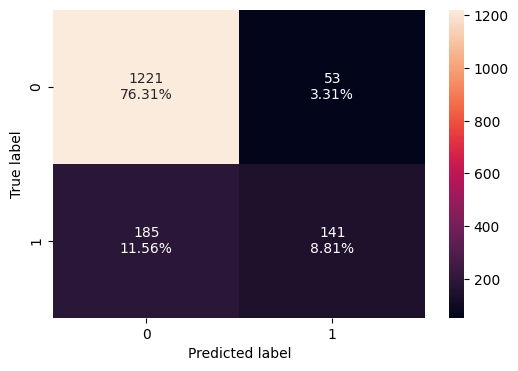

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
# store results of model_0 in dataframe

model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8662,0.4908,0.7692,0.5993


In [ ]:
model_0_valid_perf = model_performance_classification(model_0, X_val, y_val)
model_0_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8512,0.4325,0.7268,0.5423


In [ ]:
# dataframe showing diff btwn Train and Val metrics

model_0_perf_diff = model_0_train_perf - model_0_valid_perf
model_0_perf_diff


,Accuracy,Recall,Precision,F1 Score
0,0.0150,0.0583,0.0424,0.0569


#### Summary of Findings

**Training Recall**: 0.4908

**Validation Recall**: 0.4325 (Difference: 0.0583)

**Training F1-score**: 0.5993

**Validation F1-score**: 0.5423 (Difference: 0.0569)




**Churn Prediction:**

  - Correctly identified churners:
        Training: 640 out of 1304 (Low Recall)
        Validation: 141 out of 326 (Very Low Recall)


  - Correctly identified non-churners:
        Training: 4904 out of 5096
        Validation: 1221 out of 1274 (High Recall)


**Key Observation:**

The significant gap between training and validation metrics (Recall and F1-score) suggests overfitting. The model is performing better on the training data but struggles to generalize to unseen data (validation set).


The low Recall score for churners (0.4325) indicates the model struggles to correctly identify a significant portion of customers likely to churn. This is further supported by the higher number of correctly predicted non-churners compared.





## Model Performance Improvement

### Neural Network with Adam Optimizer

##### Step 1 - Clear session

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Step 2 - Initialize Neural Network (add layers)

In [ ]:
#Initializing the neural network
# input layer 124, hidden layers 64 and 32 neurons
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))

# output layer
model_1.add(Dense(1, activation = 'sigmoid'))


#### Step 3 - Initialize Model Optimizer and Metrics

In [ ]:
# Initialize Adam  as the optimizer using default learning rate

optimizer = Adam()
metric = keras.metrics.Recall()


#### Step 4 - Compile the model

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and F1 as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#### Step 5 - Print Model Summary

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 6 - Fit the Model

In [ ]:
# Fitting the NN with Adam
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)

start = time.time()
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    callbacks=[early_stopping],
    verbose =2
)

end=time.time()

Epoch 1/115
100/100 - 1s - loss: 0.4645 - recall: 0.0383 - val_loss: 0.4261 - val_recall: 0.1350 - 1s/epoch - 14ms/step
Epoch 2/115
100/100 - 0s - loss: 0.4121 - recall: 0.2577 - val_loss: 0.4132 - val_recall: 0.2853 - 254ms/epoch - 3ms/step
Epoch 3/115
100/100 - 0s - loss: 0.3932 - recall: 0.3512 - val_loss: 0.3990 - val_recall: 0.3650 - 240ms/epoch - 2ms/step
Epoch 4/115
100/100 - 0s - loss: 0.3779 - recall: 0.3597 - val_loss: 0.3918 - val_recall: 0.4601 - 257ms/epoch - 3ms/step
Epoch 5/115
100/100 - 0s - loss: 0.3650 - recall: 0.4118 - val_loss: 0.3904 - val_recall: 0.2485 - 232ms/epoch - 2ms/step
Epoch 6/115
100/100 - 0s - loss: 0.3520 - recall: 0.4179 - val_loss: 0.3713 - val_recall: 0.4755 - 261ms/epoch - 3ms/step
Epoch 7/115
100/100 - 0s - loss: 0.3431 - recall: 0.4609 - val_loss: 0.3614 - val_recall: 0.3344 - 213ms/epoch - 2ms/step
Epoch 8/115
100/100 - 0s - loss: 0.3351 - recall: 0.4517 - val_loss: 0.3576 - val_recall: 0.4233 - 272ms/epoch - 3ms/step
Epoch 9/115
100/100 - 0s -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.123029708862305


#### Step 7 - Plot Model Loss

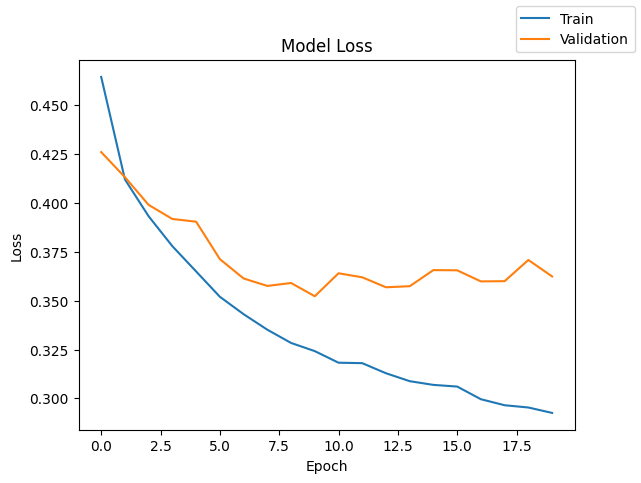

In [ ]:
plot(history_1,'loss')

#### Step 8 - Store model metrics in dataframes using - model_performance_classification

In [ ]:
# store results of model_1 in dataframe model_performance_classification

model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8705,0.5054,0.7817,0.6139


In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_1_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8512,0.4264,0.7316,0.5388


In [ ]:
# diff between train and val metrics
model_1_perf_diff = model_1_train_perf - model_1_valid_perf
model_1_perf_diff

,Accuracy,Recall,Precision,F1 Score
0,0.0192,0.0790,0.0502,0.0751


In [ ]:
#calculating predicted for training
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 1ms/step


#### Step 9 - Plot confusion matrix

Confusion Matrix for Validation Dataset

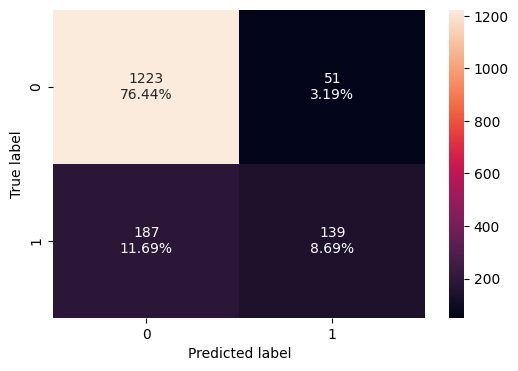

In [ ]:
make_confusion_matrix(y_val, y_val_pred)


Classisification Report for Validation Dataset

In [ ]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.43      0.54       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.73      1600
weighted avg       0.84      0.85      0.84      1600



#### Step 10 - Summarize Findings

**Training Recall**: 0.5054

**Validation Recall**: 0.4264 (Difference: 0.0790)

**Training F1-score**: 0.6139

**Validation F1-score**: 0.5388 (Difference: 0.0751)


**Validation Churn Prediction:**

  - Correctly identified churners:
          139 out of 326 (Low Recall - 0.43)

  - Correctly identified non-churners:
          1223 out of 1274 (High Recall - 0.96)


**Key Observations:**

The gap between training and validation metrics (Recall and F1-score) suggests potential overfitting.


The Recall score for churners in validation (0.4264) is still low, indicating the model struggles to identify some at-risk customers.

Similar to the previous model, the model performs better at identifying non-churners compared to churners.

**Compared to Neural Network (SGD):**

The Recall score for churners in validation is marginally higher, suggesting slightly better performance in identifying at-risk customers.

### Neural Network with Adam Optimizer and Dropout

Adding Dropout of 0.3 to last hidden layer in the model.  

##### Step 1 - Clear session

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Step 2 - Initialize Neural Network (add layers)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
model_2.add(Dense(64, activation='relu'))

model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.3))
# output layer
model_2.add(Dense(1, activation = 'sigmoid'))



#### Step 3 - Initialize Model Optimizer and Metrics

In [ ]:
optimizer = Adam()
metric = keras.metrics.Recall()

#### Step 4 - Compile the model

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and Recall as the metric
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#### Step 5 - Print Model Summary

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 6 - Fit the Model

In [ ]:
# define early stopping parameters

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

start = time.time()
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose =2,
    callbacks=[early_stopping]

)

end=time.time()

Epoch 1/115
100/100 - 2s - loss: 0.4792 - recall: 0.0583 - val_loss: 0.4272 - val_recall: 0.1350 - 2s/epoch - 20ms/step
Epoch 2/115
100/100 - 0s - loss: 0.4232 - recall: 0.2431 - val_loss: 0.4141 - val_recall: 0.2362 - 413ms/epoch - 4ms/step
Epoch 3/115
100/100 - 0s - loss: 0.4078 - recall: 0.3190 - val_loss: 0.4037 - val_recall: 0.2883 - 386ms/epoch - 4ms/step
Epoch 4/115
100/100 - 0s - loss: 0.3941 - recall: 0.3474 - val_loss: 0.3962 - val_recall: 0.4264 - 381ms/epoch - 4ms/step
Epoch 5/115
100/100 - 0s - loss: 0.3837 - recall: 0.3873 - val_loss: 0.3942 - val_recall: 0.2577 - 366ms/epoch - 4ms/step
Epoch 6/115
100/100 - 0s - loss: 0.3707 - recall: 0.3949 - val_loss: 0.3773 - val_recall: 0.4264 - 369ms/epoch - 4ms/step
Epoch 7/115
100/100 - 0s - loss: 0.3597 - recall: 0.4302 - val_loss: 0.3681 - val_recall: 0.3252 - 397ms/epoch - 4ms/step
Epoch 8/115
100/100 - 0s - loss: 0.3507 - recall: 0.4172 - val_loss: 0.3653 - val_recall: 0.3742 - 295ms/epoch - 3ms/step
Epoch 9/115
100/100 - 0s -

Print out time taken to run model


In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.233285903930664


#### Step 7 - Plot Model Loss

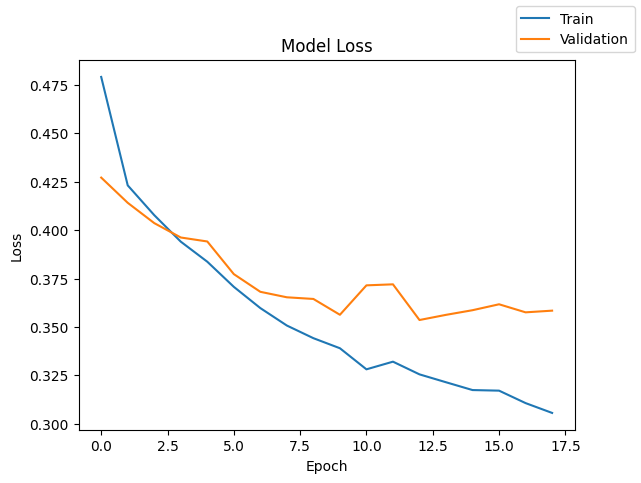

In [ ]:
plot(history_2,'loss')

#### Step 8 - Store model metrics in dataframes using - model_performance_classification

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8741,0.4962,0.8128,0.6162


In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val, y_val)
model_2_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8544,0.4110,0.7657,0.5349


In [ ]:
# diff btween model_2_valid_perf and  model_2_train_perf

model_2_perf_diff = model_2_train_perf - model_2_valid_perf
model_2_perf_diff


,Accuracy,Recall,Precision,F1 Score
0,0.0197,0.0851,0.0471,0.0813


In [ ]:
#calculating predicted for training
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 1ms/step


#### Step 9 - Plot confusion matrix

Confusion Matrix - Validation Data

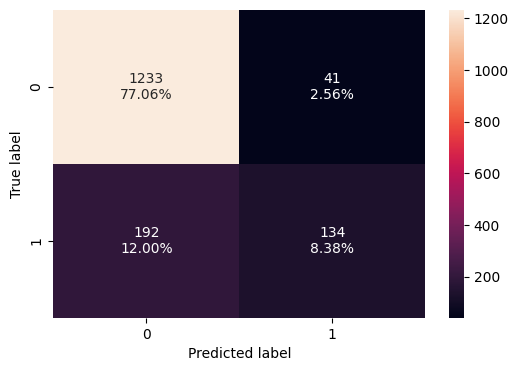

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

Classisification Report - Validation Data

In [ ]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      1274
         1.0       0.77      0.41      0.53       326

    accuracy                           0.85      1600
   macro avg       0.82      0.69      0.72      1600
weighted avg       0.84      0.85      0.84      1600



#### Step 10 - Summarize Findings

**Training Recall**: 0.4962

**Validation Recall**: 0.4110 (Difference: 0.0851)

**Dropout**: 0.3 applied to the last hidden layer

**Validation Churn Prediction**:

      Correctly identified churners: 134 out of 326 (Low Recall)


**Key Observations:**

The gap between training and validation metrics (Recall) suggests overfitting, potentially similar or even slightly worse compared to previous models.

Adding a dropout layer with a rate of 0.3 did not significantly improve Recall on the validation set for identifying churners.

The model still struggles to identify a significant portion of at-risk customers, as indicated by the low Recall score (0.4110) and the number of correctly predicted churners (134 out of 326).

### Generate SMOTE dataset

In [ ]:
sm  = SMOTE(random_state=42)
#Fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

#### Step 1 - Clear session

In [ ]:
# clear session and reset random seeds

backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Step 2 - Initialize Neural Network (add layers)

In [ ]:
#Initializing the model
model_3 = Sequential()

# input layer
model_3.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# hidden layer 1
model_3.add(Dense(64,activation='relu'))

# hidden layer 2
model_3.add(Dense(32,activation='relu'))

# output layer
model_3.add(Dense(1, activation = 'sigmoid'))



#### Step 3 - Initialize Model Optimizer and Metrics

In [ ]:
optimizer = tf.keras.optimizers.SGD()
metric = keras.metrics.Recall()

#### Step 4 - Compile the model

In [ ]:
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#### Step 5 - Print Model Summary

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 6 - Fit the Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto', restore_best_weights=True)

start = time.time()
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose = 2,
    callbacks=[early_stopping]
    ## Complete the code to specify the number of epoch
)

end=time.time()

Epoch 1/115
160/160 - 2s - loss: 0.6911 - recall: 0.2429 - val_loss: 0.6704 - val_recall: 0.5031 - 2s/epoch - 10ms/step
Epoch 2/115
160/160 - 0s - loss: 0.6680 - recall: 0.5799 - val_loss: 0.6427 - val_recall: 0.6135 - 476ms/epoch - 3ms/step
Epoch 3/115
160/160 - 0s - loss: 0.6398 - recall: 0.6748 - val_loss: 0.6001 - val_recall: 0.6104 - 413ms/epoch - 3ms/step
Epoch 4/115
160/160 - 0s - loss: 0.6094 - recall: 0.6894 - val_loss: 0.5825 - val_recall: 0.6687 - 400ms/epoch - 3ms/step
Epoch 5/115
160/160 - 0s - loss: 0.5856 - recall: 0.7157 - val_loss: 0.5740 - val_recall: 0.6963 - 490ms/epoch - 3ms/step
Epoch 6/115
160/160 - 0s - loss: 0.5716 - recall: 0.7231 - val_loss: 0.5601 - val_recall: 0.6902 - 464ms/epoch - 3ms/step
Epoch 7/115
160/160 - 0s - loss: 0.5632 - recall: 0.7302 - val_loss: 0.5631 - val_recall: 0.7055 - 471ms/epoch - 3ms/step
Epoch 8/115
160/160 - 1s - loss: 0.5574 - recall: 0.7339 - val_loss: 0.5524 - val_recall: 0.6902 - 512ms/epoch - 3ms/step
Epoch 9/115
160/160 - 0s -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.298206806182861


#### Step 7 - Plot Model Loss

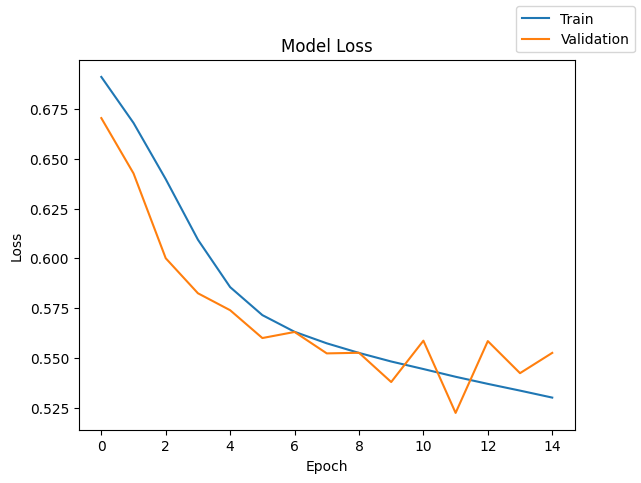

In [ ]:
plot(history_3,'loss')

#### Step 8 - Store model metrics in dataframes using - model_performance_classification

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_smote, y_train_smote)
model_3_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7318,0.7151,0.7399,0.7273


In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val, y_val)
model_3_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7288,0.6748,0.4015,0.5034


In [ ]:
# diff btwn train and val metrics

model_3_perf_diff = model_3_train_perf - model_3_valid_perf
model_3_perf_diff

,Accuracy,Recall,Precision,F1 Score
0,0.0031,0.0402,0.3384,0.2238


#### Step 9 - Plot confusion matrix

In [ ]:
#calculating predicted for training
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 1ms/step


Confusion Maxtrix - Validation Data

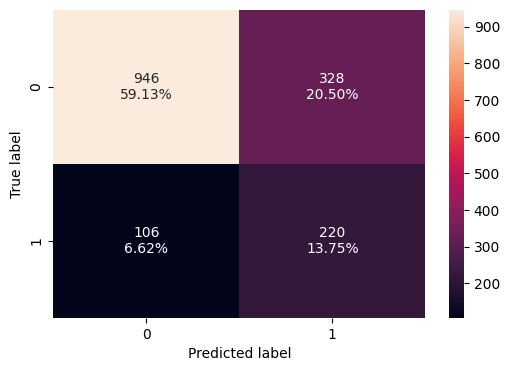

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

Classification Report - Validation Data

In [ ]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      1274
         1.0       0.40      0.67      0.50       326

    accuracy                           0.73      1600
   macro avg       0.65      0.71      0.66      1600
weighted avg       0.80      0.73      0.75      1600



#### Step 10 - Summarize Findings

**Training Recall**: 0.7151

**Validation Recall**: 0.6748 (Difference: 0.0402)

**SMOTE**: Applied to oversample the minority class (churners) in the training data to address class imblanced.  


**Validation Churn Prediction:**

  - Correctly identified churners: 220 out of 326 (High Recall)


**Key Observation:**

This model shows the smallest gap between training and validation metrics (Recall) compared to all previous models, suggesting significantly reduced overfitting.

Recall for churners in validation (0.6748) is the highest achieved so far, indicating a substantial improvement in identifying at-risk customers.

The model correctly identified 220 churners out of 326, a significant increase compared to previous models.


**Strengths:**

Applying SMOTE with SGD appears to be a successful strategy to address overfitting and improve model generalizability.



### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

#### Step 1 - Clear session

In [ ]:
backend.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Step 2 - Initialize Neural Network (add layers)

In [ ]:
#Initializing the model
model_4 = Sequential()

# input layer
model_4.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
# hidden layer 1
model_4.add(Dense(64,activation='relu'))

# hidden layer 2
model_4.add(Dense(32,activation='relu'))

# output layer
model_4.add(Dense(1, activation = 'sigmoid'))

#### Step 3 - Initialize Model Optimizer and Metrics

In [ ]:
optimizer = optimizer = Adam()
metric = keras.metrics.Recall()

#### Step 4 - Compile the model

In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#### Step 5 - Print Model Summary

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 6 - Fit the Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto', restore_best_weights=True)

start = time.time()
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose = 2,
    callbacks=[early_stopping]
)

end=time.time()

Epoch 1/115
160/160 - 2s - loss: 0.5699 - recall: 0.7084 - val_loss: 0.5581 - val_recall: 0.7239 - 2s/epoch - 10ms/step
Epoch 2/115
160/160 - 1s - loss: 0.4998 - recall: 0.7526 - val_loss: 0.4651 - val_recall: 0.6656 - 554ms/epoch - 3ms/step
Epoch 3/115
160/160 - 1s - loss: 0.4622 - recall: 0.7704 - val_loss: 0.5410 - val_recall: 0.7577 - 503ms/epoch - 3ms/step
Epoch 4/115
160/160 - 1s - loss: 0.4406 - recall: 0.7900 - val_loss: 0.4778 - val_recall: 0.6933 - 527ms/epoch - 3ms/step
Epoch 5/115
Restoring model weights from the end of the best epoch: 2.
160/160 - 1s - loss: 0.4226 - recall: 0.7943 - val_loss: 0.5570 - val_recall: 0.7761 - 517ms/epoch - 3ms/step
Epoch 5: early stopping


In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  3.9113850593566895


#### Step 7 - Plot Model Loss

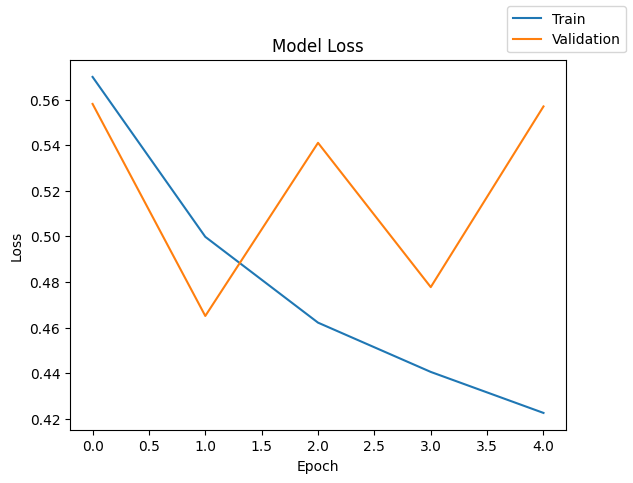

In [ ]:
plot(history_4,'loss')

#### Step 8 - Store model metrics in dataframes using - model_performance_classification

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_smote, y_train_smote)
model_4_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7768,0.7282,0.8066,0.7654


In [ ]:
# store validation metrics in dataframe
model_4_valid_perf = model_performance_classification(model_4, X_val, y_val)
model_4_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7856,0.6656,0.4812,0.5586


In [ ]:
# store diff btwn train and val in dataframe

model_4_perf_diff = model_4_train_perf - model_4_valid_perf
model_4_perf_diff

,Accuracy,Recall,Precision,F1 Score
0,-0.0088,0.0626,0.3254,0.2068


#### Step 9 - Plot confusion matrix

In [ ]:
#calculating predicted for training
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 1ms/step


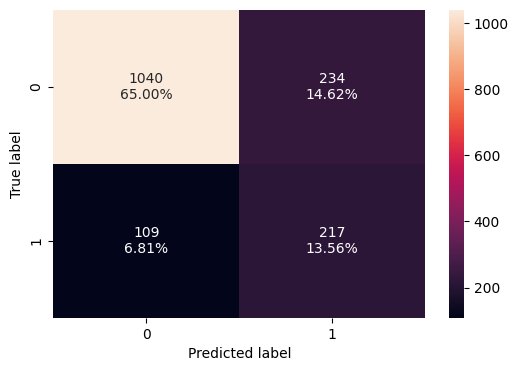

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
# print classification report for validation dataset

cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      1274
         1.0       0.48      0.67      0.56       326

    accuracy                           0.79      1600
   macro avg       0.69      0.74      0.71      1600
weighted avg       0.82      0.79      0.80      1600



#### Step 10 - Summarize Findings

**Training Recall**: 0.7282

**Validation Recall**: 0.6656 (Difference: 0.0626)

**SMOTE**: Applied to oversample the minority class (churners) in the training data


**Validation Churn Prediction:**

  - Correctly identified churners: 217 out of 326


**Key Observations:**


The model achieved a  Recall for churners in validation (0.6656), successfully identifying a significant portion of at-risk customers. It correctly predicted 217 churners out of 326.


**Comparison to Neural Network (SGD) SMOTE:**

Neural Network (Adam) SMOTE shows a slightly larger difference between training and validation Recall compared to the SGD version. This could suggest that the Adam optimizer might be contributing slightly more to overfitting in this specific case.

Both models achieved similar performance in identifying churners based on Recall score and the number of correctly predicted churners.

The model has a low precision of 0.48 on the validation dataset. This suggests a high number of false positives, meaning the model is incorrectly classifying many non-churners as churners.  False positives (low Precision) can be problematic. This could lead to wasted resources spent on unnecessary customer retention efforts for those who are not likely to churn.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

#### Step 1 - Clear session

In [ ]:
backend.clear_session()


#reset random seeds
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Step 2 - Initialize Neural Network (add layers)

In [ ]:
model_5 = Sequential()
# model input layer with 128 neurons
model_5.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))

# first hidden layer
model_5.add(Dense(64,activation='relu'))

# second hidden layer
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.3))

# ouput layer
model_5.add(Dense(1, activation = 'sigmoid'))






#### Step 3 - Initialize Model Optimizer and Metrics

In [ ]:
optimizer = optimizer = Adam()
metric = keras.metrics.Recall()

#### Step 4 - Compile the model

In [ ]:
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

#### Step 5 - Print Model Summary

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 6 - Fit the Model

In [ ]:
#set early stopping parameters

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto', restore_best_weights=True)

start = time.time()
history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=epochs,
    verbose = 2,
    callbacks=[early_stopping]
)

end=time.time()

Epoch 1/115
160/160 - 2s - loss: 0.5859 - recall: 0.6982 - val_loss: 0.5640 - val_recall: 0.7086 - 2s/epoch - 14ms/step
Epoch 2/115
160/160 - 0s - loss: 0.5265 - recall: 0.7471 - val_loss: 0.4941 - val_recall: 0.6810 - 364ms/epoch - 2ms/step
Epoch 3/115
160/160 - 0s - loss: 0.4876 - recall: 0.7639 - val_loss: 0.5391 - val_recall: 0.7209 - 357ms/epoch - 2ms/step
Epoch 4/115
160/160 - 0s - loss: 0.4622 - recall: 0.7783 - val_loss: 0.4897 - val_recall: 0.6994 - 379ms/epoch - 2ms/step
Epoch 5/115
160/160 - 0s - loss: 0.4433 - recall: 0.7902 - val_loss: 0.5349 - val_recall: 0.7730 - 335ms/epoch - 2ms/step
Epoch 6/115
160/160 - 0s - loss: 0.4253 - recall: 0.8051 - val_loss: 0.4905 - val_recall: 0.7086 - 371ms/epoch - 2ms/step
Epoch 7/115
160/160 - 0s - loss: 0.4104 - recall: 0.8195 - val_loss: 0.4663 - val_recall: 0.7209 - 325ms/epoch - 2ms/step
Epoch 8/115
160/160 - 0s - loss: 0.3958 - recall: 0.8222 - val_loss: 0.4338 - val_recall: 0.6534 - 334ms/epoch - 2ms/step
Epoch 9/115
160/160 - 0s -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.070294857025146


#### Step 7 - Plot Model Loss

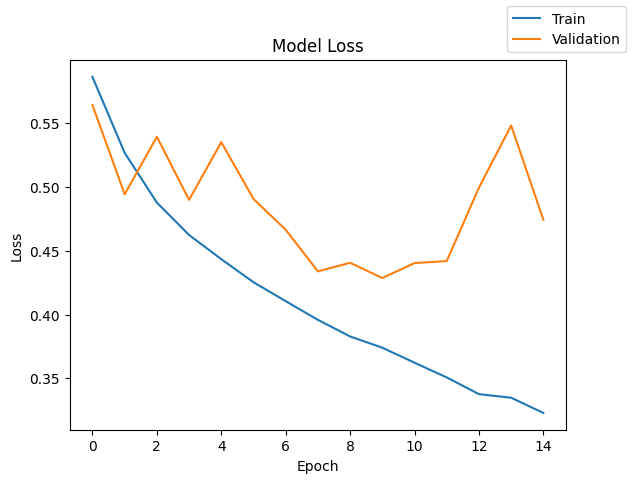

In [ ]:
plot(history_5,'loss')

#### Step 8 - Store model metrics in dataframes using - model_performance_classification

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train_smote, y_train_smote)
model_5_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8481,0.8265,0.8638,0.8448


In [ ]:
model_5_valid_perf = model_performance_classification(model_5, X_val, y_val)
model_5_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8087,0.6104,0.5265,0.5653


In [ ]:
# store diff btwn train and val metics in dataframe

model_5_perf_diff = model_5_train_perf - model_5_valid_perf
model_5_perf_diff

,Accuracy,Recall,Precision,F1 Score
0,0.0394,0.2161,0.3374,0.2794


#### Step 9 - Plot confusion matrix

In [ ]:
#calculating predicted for training
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)

#calculating predicted for validation
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

50/50 [==============================] - 0s 1ms/step


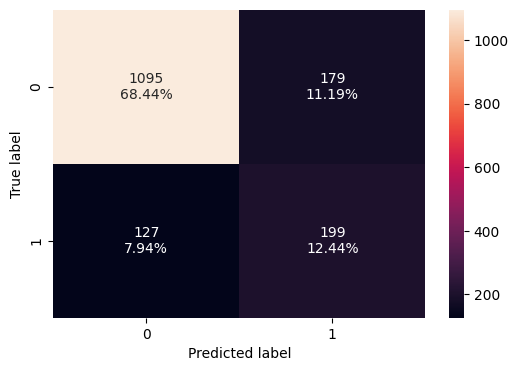

In [ ]:
#confustion matrix for validation data
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
# print classification report for validation dataset

cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1274
         1.0       0.53      0.61      0.57       326

    accuracy                           0.81      1600
   macro avg       0.71      0.73      0.72      1600
weighted avg       0.82      0.81      0.81      1600



#### Step 10 - Summarize Findings

**Training Recall**: 0.8265

**Validation Recall**: 0.6104 (Difference: 0.2161)

**SMOTE**: Applied to oversample the minority class (churners) in the training data

**Dropout**: 0.3 applied to the last hidden layer


**Validation Churn Prediction:**
  -  Correctly identified churners: 199 out of 326 (Moderate Recall)
  -  Correctly identified non-churners: Precision of 0.53


**Key Observations:**


The significant gap between training and validation metrics (Recall) suggests overfitting, potentially more severe than the previous Adam + SMOTE model.

The model's Recall for churners in validation (0.6104) is moderate, indicating it misses a substantial portion of at-risk customers compared to the previous model.

The model's precision of 0.53 on the validation dataset suggests a some improvement in avoiding false positives. While not ideal, it's an improvement compared to the lower precision (0.48) of the previous Adam + SMOTE model.

### Comparing the Models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network (Adam)",
    "Neural Network (Adam , dropout [0.3)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam, SMOTE, dropout [0.3])"
  ]


In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network (Adam)",
    "Neural Network (Adam , dropout [0.3)",
    "Neural Network (SGD, SMOTE)",
    "Neural Network (Adam, SMOTE)",
    "Neural Network (Adam, SMOTE, dropout [0.3])"
]

In [ ]:
models_train_comp_df.T

,Accuracy,Recall,Precision,F1 Score
Neural Network (SGD),0.8662,0.4908,0.7692,0.5993
Neural Network (Adam),0.8705,0.5054,0.7817,0.6139
"Neural Network (Adam , dropout [0.3)",0.8741,0.4962,0.8128,0.6162
"Neural Network (SGD, SMOTE)",0.7318,0.7151,0.7399,0.7273
"Neural Network (Adam, SMOTE)",0.7768,0.7282,0.8066,0.7654
"Neural Network (Adam, SMOTE, dropout [0.3])",0.8481,0.8265,0.8638,0.8448


In [ ]:
models_valid_comp_df.T

,Accuracy,Recall,Precision,F1 Score
Neural Network (SGD),0.8512,0.4325,0.7268,0.5423
Neural Network (Adam),0.8512,0.4264,0.7316,0.5388
"Neural Network (Adam , dropout [0.3)",0.8544,0.4110,0.7657,0.5349
"Neural Network (SGD, SMOTE)",0.7288,0.6748,0.4015,0.5034
"Neural Network (Adam, SMOTE)",0.7856,0.6656,0.4812,0.5586
"Neural Network (Adam, SMOTE, dropout [0.3])",0.8087,0.6104,0.5265,0.5653


In [ ]:
#  subtract Recall column in models_valid_comp_df.T from models_train_comp_df.T and convert to a dataframe

trainvaldiff = (models_train_comp_df.T['Recall'] - models_valid_comp_df.T['Recall']).to_frame()


Difference between training and validation

In [ ]:
# show diff between train and validation scores for each model
trainvaldiff

,Recall
Neural Network (SGD),0.0583
Neural Network (Adam),0.0790
"Neural Network (Adam , dropout [0.3)",0.0851
"Neural Network (SGD, SMOTE)",0.0402
"Neural Network (Adam, SMOTE)",0.0626
"Neural Network (Adam, SMOTE, dropout [0.3])",0.2161


#### Best Model Selection

I selected the model **Neural Network (SGD, SMOTE)** as the best model.  It had the highest validation recall metric and lowest difference between training and validation recall scores.

### Testing Final Model

While "Neural Network (SGD, SMOTE)" showed the best initial results with highest recall score (0.67) on the validation data, further tuning is recommended before deployment. This will ensure the model generalizes well and doesn't overfit the training data. Techniques like hyperparameter tuning via grid search can be used for this purpose.


#### Evaluating Neural Network (SGD, SMOTE) on Test dataset

In [ ]:
## get predicted values for test dataset

y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.42      0.71      0.53       407

    accuracy                           0.74      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.74      0.76      2000



In [ ]:
# view metrics for test dataset

model_performance_classification(model_3, X_test, y_test)

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7415,0.7150,0.4205,0.5296


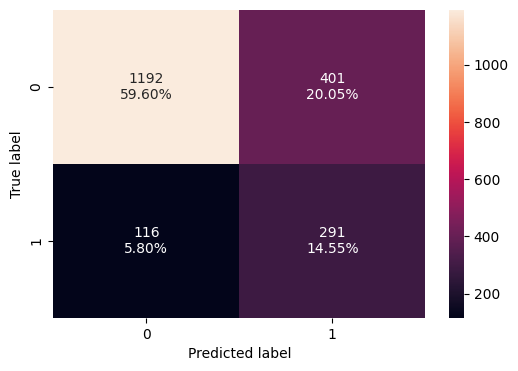

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

#### Summary

The "Neural Network (SGD, SMOTE)" model identified 291 churners out of 407 on the test data (recall of 0.71). However, its low precision of 0.42 indicates a high number of false positives. This means the model is incorrectly classifying many non-churning customers as at risk of churn, which could lead to wasted resources.

Interestingly, the model seems to struggle with accurately predicting the non-churning class as well.  The recall for non-churners on the test dataset is 0.75.  This further highlights the need for refinement.

The low precision for churners indicates the model is likely overfitting.
Flagging too many non-churners as churn risk can be inefficient.
Both class performances (churners and non-churners) suggest room for improvement.  Overall, the model needs further work before being reliable for deployment.



## Actionable Insights and Business Recommendations

***Customer Segmentation and Churn Risk:***

 - **Geography**: Customers in Germany exhibit a higher churn rate compared to France and Spain. The bank should segment its customer base by country and prioritize retention efforts for German customers. Tailored marketing campaigns or loyalty programs might be effective in these regions.

 - **Activity**: Inactive members are significantly more likely to churn. The bank should identify and proactively engage with inactive customers to understand their reasons for inactivity and address any concerns. This could involve personalized communication, targeted promotions, or offering incentives to re-engage them.

 - **Age**: Churn is more prevalent among older customers. Analyze the specific needs and preferences of this demographic to develop targeted retention strategies. This might involve offering products or services catering to their financial goals or life stage needs.

  Investigate the reasons behind higher churn rates in Germany and among older customers. Conducting surveys or focus groups within these segments could provide valuable insights.

***Customer Engagement and Retention:***

- **Focus on Relationship Building**: While credit score and financial information are essential, the data suggests factors like activity and potentially demographics like age might play a bigger role in churn. Building stronger relationships with customers through proactive engagement can help reduce churn. This could involve personalized communication, offering valuable financial advice, or organizing events that foster customer loyalty.

- **Leverage Customer Insights**: Integrate the findings on churn risk factors (e.g., inactivity, age, geography) with other customer data (e.g., product preferences, past interactions) to develop personalized retention strategies. This could involve product recommendations, targeted promotions, or tailored service offerings that address specific customer needs.


**Model Considerations:**

I would recommend holding off on deploying the "Neural Network (SGD, SMOTE)" model for now. While it shows promise with the highest validation Recall score (0.67), there's room for improvement, especially considering its potential for overfitting. In the next interation I will experiment with the following methods to improve model performance.   The models performance on the test dataset was slightly better, with a Recall score of (0.71).  


1.   Grid Search or Randomized Search to explore different hyperparameter configurations for "Neural Network (SGD, SMOTE)." Focus on parameters like learning rate, number of hidden layers/neurons, optimizer settings (e.g., momentum), and activation functions. This might help improve model generalization and reduce overfitting.

2.   Class Weighting: Assign higher weights to the minority class (churners) during training.

3.   Introduce L1 or L2 regularization to penalize model complexity and discourage overfitting. These techniques can reduce model reliance on specific features and improve generalization.


In additon to further tuning the model, I recommend exploring the possibility of incorporating customer interaction data (e.g., phone calls, website visits) into future churn prediction models. This might provide a more holistic view of customer behavior and churn risk.

